# Predicting Red Wine Quality

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

From this dataset we're gonna do an ann model for linear regression to predict the variable of Quality from numerical features in the datasets.

## knowing the datasets

1. **fixed acidity**: most acids involved with wine or fixed or nonvolatile
2. **volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. **citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines (**might be the key to good quality as well**)
4. **residual sugar**: the amount of sugar remaining after fermentation stops, **it's rare to find wines with less than 1 gram/liter**.
5. **chlorides**: the amount of salt in the wine
6. **free sulfur dioxide** : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
7. **total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine
8. **density** : the density of water is close to that of water depending on the percent alcohol and sugar content
9. **pH** : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
10. **sulphates** : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial
11. **alcohol** : The percentage of alcohol in it.
12. **quality** (score between 0 and 10) : output variable, it's the value how good the quality of the wine , <5 (worse) and 5>= (better).

In [1]:
!pip install keras-tuner

## Importing Libraries

In [2]:
import keras_tuner as kt

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as gro
from plotly.subplots import make_subplots
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Input, Concatenate, LeakyReLU
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder,MinMaxScaler

SEED_VALUE=123
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)


2025-03-08 14:55:58.120509: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Print Device (Need GPU And CPU For Deep Learning)

In [ ]:
print('num Device: ',len(tf.config.experimental.list_physical_devices()))
print(tf.config.experimental.list_physical_devices())

### Import Datasets

In [4]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## EDA

#### See the dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### look for missing values and remove it

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

woh aman na jadi lanjut duplicate

#### look for duplicates and remove it

In [8]:
df.duplicated().sum()

240

buset banyak banget dupsnya , karena dups hanya akan memberikan info yang sama jadi kita hapus aja.

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Split Numerical and Categorical & See Unique values

next kita mau split column categorical dan numerical lalu di visualization untuk ngelihat distribusinya. Tapi sebelum itu kita liat dulu jumlah unique valuesnya, dimana dr unique values kita akan mengetahui variabel mana yang categorical dan yang mana numerical.

In [10]:
def print_unique_values_count(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count} unique values\n")

print_unique_values_count(df)

fixed acidity: 96 unique values

volatile acidity: 143 unique values

citric acid: 80 unique values

residual sugar: 91 unique values

chlorides: 153 unique values

free sulfur dioxide: 60 unique values

total sulfur dioxide: 144 unique values

density: 436 unique values

pH: 89 unique values

sulphates: 96 unique values

alcohol: 65 unique values

quality: 6 unique values



dari hasil yang ada bisa kita lihat kalau semua variabel yang ada di data kita adalah numerical. Untuk quality dimana nantinya akan menjadi final output atau yang kita predict akan kita stay numerical dulu kita lihat dr distribusinya jika emang tidak memadai maka akan kita ubah jadi categorical.Nah sekarang berarti langsung aja kita bikin boxplot dan histogram untuk melihat persebaran data yang ada.

#### Visualization

In [9]:
num_cols = []
cat_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(df[i].dtype) or "float" in str(df[i].dtype):
        num_cols.append(i)

print(num_cols)
print(cat_cols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[]


#### Numerical Visualization ( Distribution & Outliers )

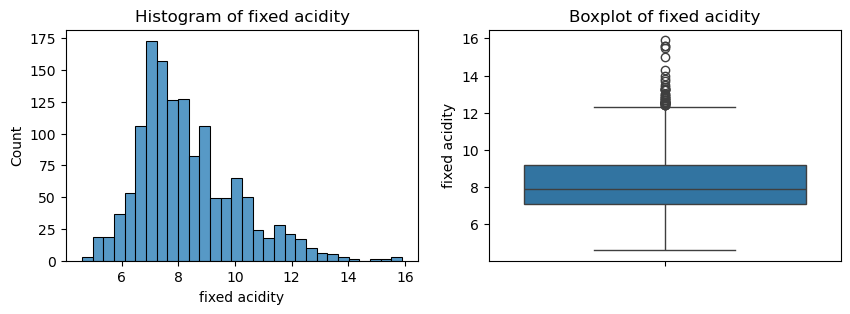

Skewness of fixed acidity: 0.9410413664561449
Kurtosis of fixed acidity: 1.0496733622032255


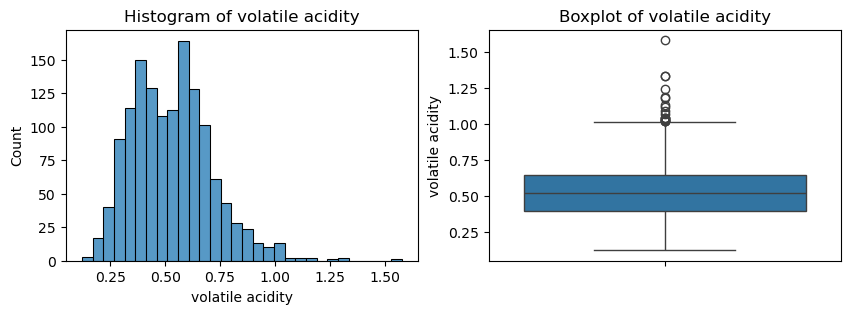

Skewness of volatile acidity: 0.7292789463991854
Kurtosis of volatile acidity: 1.2492434974517557


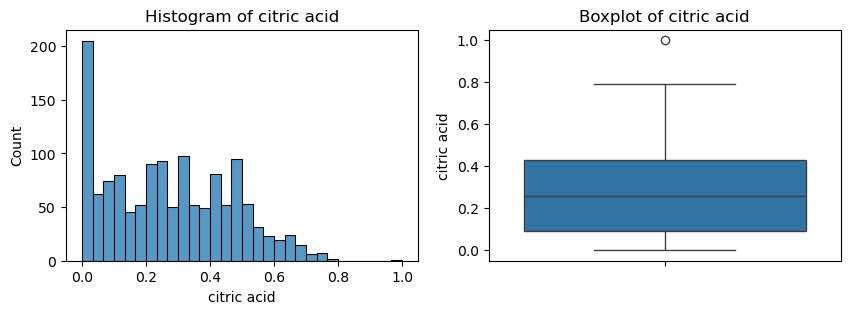

Skewness of citric acid: 0.31272554238899036
Kurtosis of citric acid: -0.7889205005417139


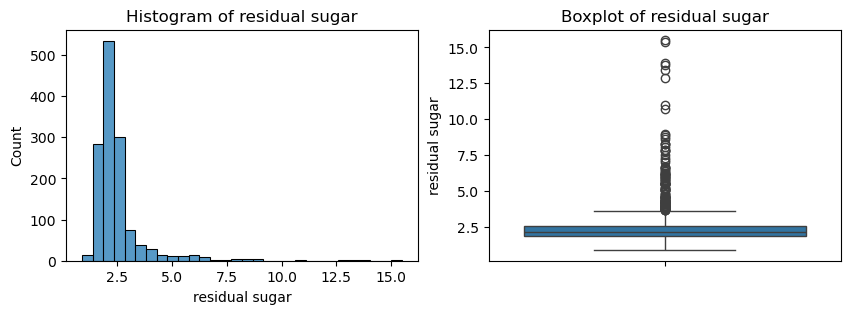

Skewness of residual sugar: 4.548153403940447
Kurtosis of residual sugar: 29.364591868714623


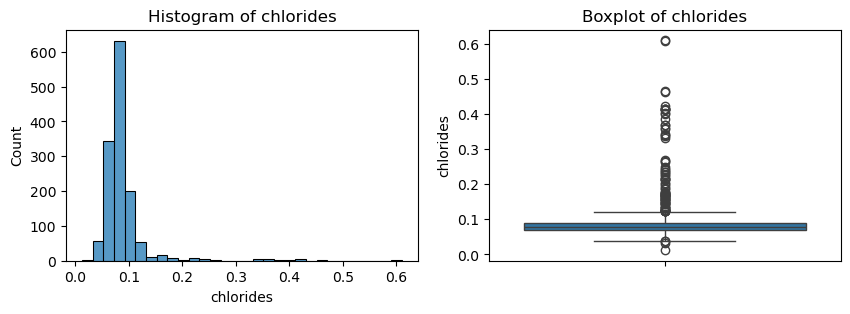

Skewness of chlorides: 5.502487294623722
Kurtosis of chlorides: 38.624653172148996


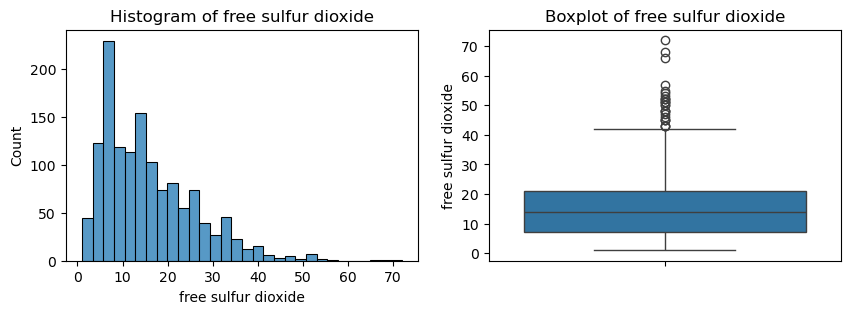

Skewness of free sulfur dioxide: 1.2265794991760643
Kurtosis of free sulfur dioxide: 1.8926907410206355


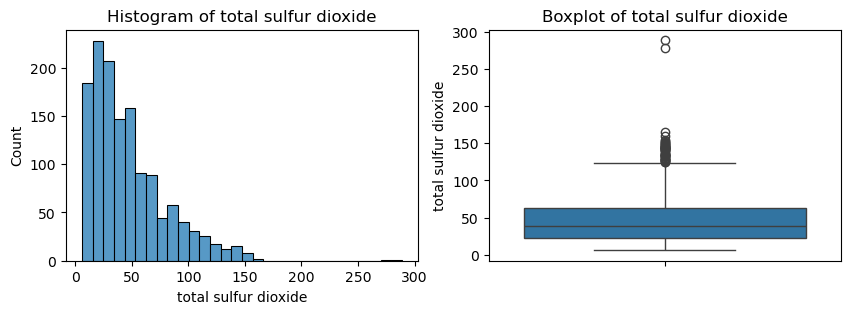

Skewness of total sulfur dioxide: 1.5403680777213933
Kurtosis of total sulfur dioxide: 4.042256740578281


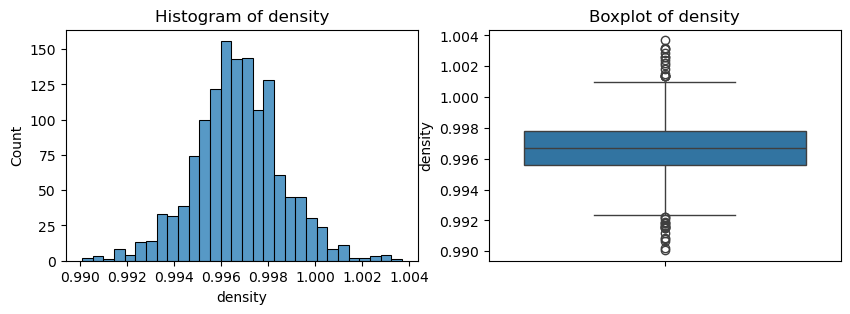

Skewness of density: 0.04477785573116107
Kurtosis of density: 0.830658762253051


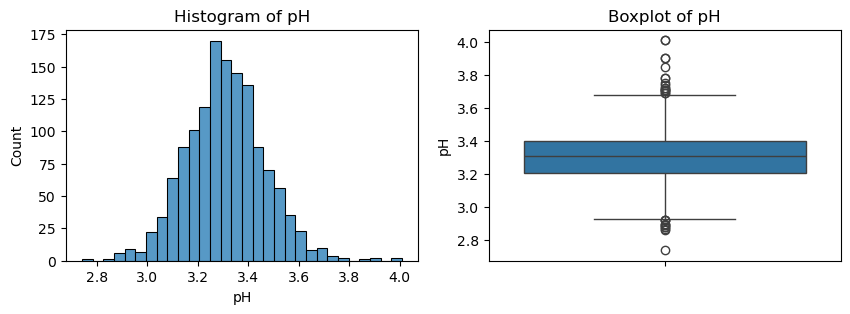

Skewness of pH: 0.2320322752014824
Kurtosis of pH: 0.8797897392873515


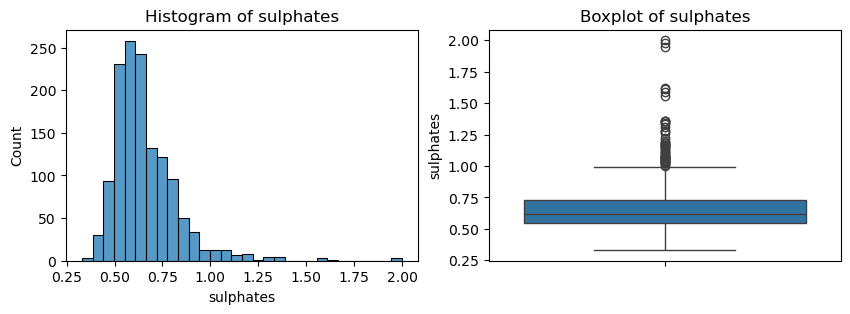

Skewness of sulphates: 2.4065046145674196
Kurtosis of sulphates: 11.10228225562913


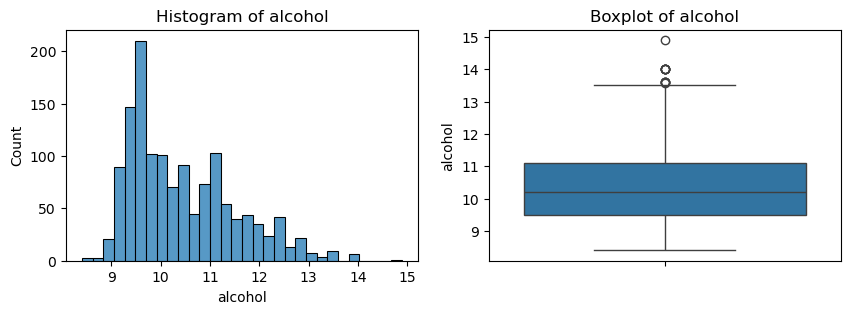

Skewness of alcohol: 0.8598411692032926
Kurtosis of alcohol: 0.1597388547368781


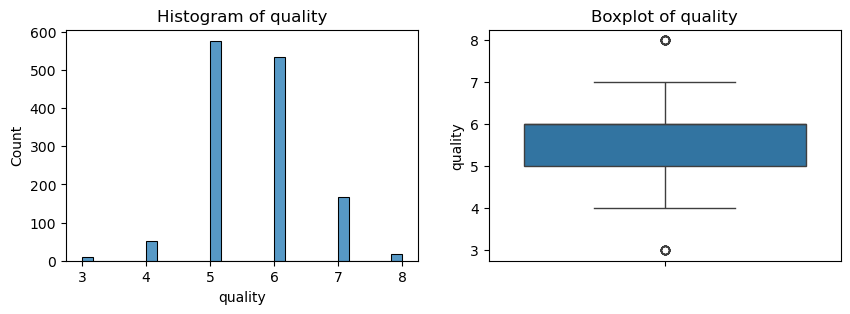

Skewness of quality: 0.19240658731658308
Kurtosis of quality: 0.3402560880620915


In [12]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'Skewness of {col}:', df[col].skew())
        print(f'Kurtosis of {col}:', df[col].kurt())

check_distribution_outliers(df, num_cols)

oke ayo kita breakdown dari penyebaran data yang ada:
1. fixed acidity, dari grafik histogram yang dihasilkan kita melihat penyebaran yang miring ke kiri dengan hal ini terbukti dengan nilai skewness yang berkisar 0.94 dimana artinya variabel ini ga sepenuhnya berdistribus normal. Sedangkan untuk nilai dari datanya terdapat beberapa outliers yang berkisar di atas 12, hal ini masih wajar sehingga akan kita simpan dan tidak kita buang. Selain itu, nilai kurtosis yang positif mengindikasikan variabel fixed acidity heavy tailed data.
2. Volatile Acidity, Dibandingkan dengan fixed acidity, penyebaran data pada volatile lebih tersebar dengan baik walaupun masih skew ke kiri dengan nilai skewness 0.72 lebih kecil dari fixed acidity. Untuk outliers masih wajar sehingga akan kita akan biarkan. Last but not least untuk kurtosis yang positive di atas 0. sekian mengindikasikan data yang heavy tailed data atau data yang peak bgt.
3. Citric Acid, dari nilai skewness yang mendekati nol mengindikasikan grafik yang mendekati distribusi normal. Namun sayangnya ada satu data yang sangat menonjol di sebelah kiri, walaupun begitu kebanyakan data yang flat / light data membuat nilai kurtosis -. untuk outlier ada 1 di atas dan masih wajar jadi kita biarin aja
4. Residual Sugar , salah satu variabel dengan skewness yang sangat ke kiri diindikasikan dari nilai skewness yang +4, ditambah kurtosisnya itu +29 mengindikasikan juga kalau datanya heavy data atau banyak yang peak data. Untuk outlier sendiri sangat banyak, namun karena masih wajar jadi kita ga apa apain
5. chlorides , sama dengan residual sugar dimana merupakan salah satu variabel dengan skewness yang sangat ke kiri diindikasikan dari nilai skewness yang +5, ditambah kurtosisnya itu +38 mengindikasikan juga kalau datanya heavy data atau banyak yang peak data. Untuk outlier sendiri sangat banyak, namun karena masih wajar jadi kita ga apa apain
6. free sulfur dioxide : ini memiliki kemiringan ke kiri di indikasikan dari nilai skewness yang +1 namun tidak separah chlorides dan residual sugar, untuk kurtosis pun sama dia heavy data tapi untuk kurtosisnya lebih rendah dari chlorides dan residual sugar. Untuk outlier karena masih wajar jadi di diamkan.
7. total sulfur dioxide : untuk total sulfur dioxide juga memiliki skewness +1 mengindikasikan dia skew ke kiri dan kurtosis yang cukup gede +4 mengindikasikan heavy data. Untuk outliers seperti biasa akan kita diamkan karena masih wajar.
8. density : salah satu variabel yang paling terdistribusi normal dengan kurtosis dan skewness yang sangat mendekati 0. untuk outliers pun kita akan hindari karena rangenya masih wajar.
9. PH : sama kayak density dia memiliki distribusi yang mendekati normal dikarenakan nilai kurtosis dan skewness yang sangat mendekati 0. untuk outliers akan dihiraukan karena masih wajar batasan nya 3-4 (sesuai dengan informasi variabel)
10. Sulphates : sulphates terlihat sangat skew ke kiri dengan nilai skewness yang +2 ditambah dengan kurtosis yang besar yaitu + 11 mengindikasikan dia heavy data atau data tinggi sangat banyak. sekali lagi untuk outliers masih wajar jadi dihiraukan
11. Alcohol : dari skewnessnya dapat dilihat aga skew ke kiri terbukti juga dari nilai skewness yang mendekati +1 mengindikasikan dia skew ke kiri . nilai kurtosis yang mendekati 0 juga mengindikasikan dia data tersebar rata. Outliers masih wajar jadi dibiarkan.
12. quality : outliers masih wajar , namun untuk distribusi data terlihat dengan jelas kalau memiliki distribusi data yang terlihat seperti bar chart ditambah dengan data 1-2 dan 9-10 miss ditambah 3 dan 8 memiliki data yang sangat kecil

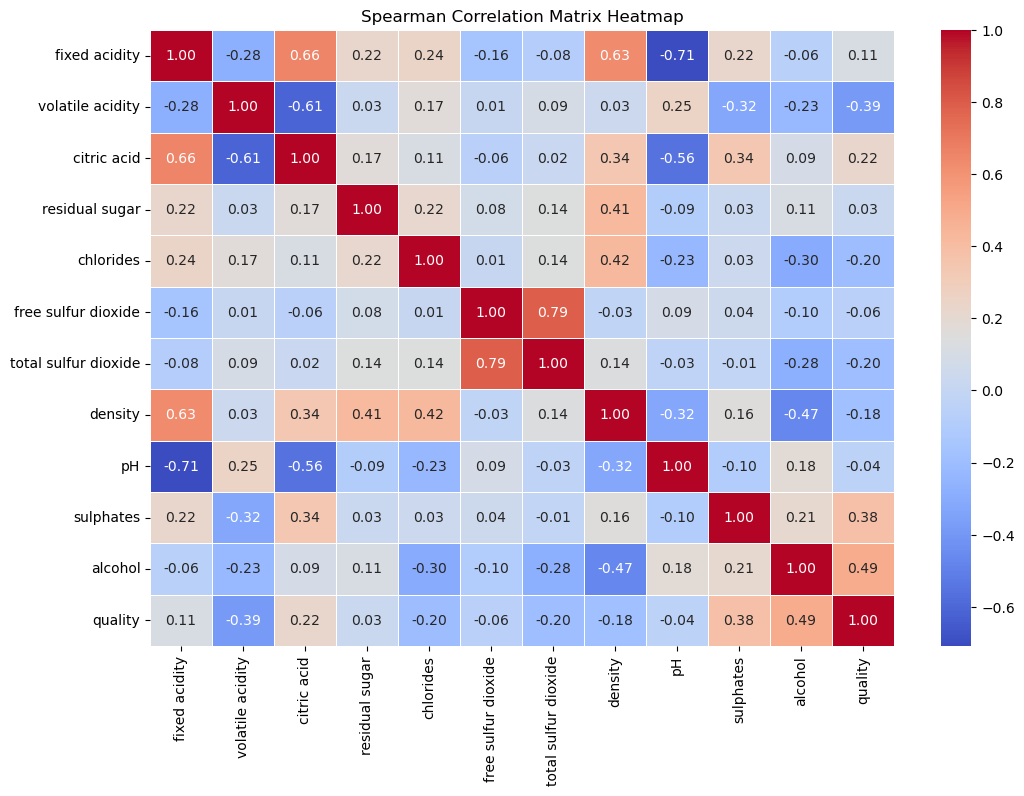

In [14]:
spearman_corr = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

## Data Preprocessing

### Splitting Datasets into train val and test

In [7]:
x,y = df.drop(['quality'],axis=1),df['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = SEED_VALUE)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.25,random_state = SEED_VALUE)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(815, 11) (815,)
(272, 11) (272,)
(272, 11) (272,)


### Scaling the Variables except for quality

In [10]:
num_cols.remove('quality')
scaler_x = RobustScaler()
x_train[num_cols] = scaler_x.fit_transform(x_train[num_cols])
x_val[num_cols] = scaler_x.transform(x_val[num_cols])
x_test[num_cols] = scaler_x.transform(x_test[num_cols])

disini hanya perlu kita scaling karena tidak ada sama sekali categorical variabel kecuali si y yaitu quality sehingga semua untuk x baik train,validate dan test kita akan scaler dan disini saya menggunakan robust dikarenakan dataset kita banyak sekali outlier sehingga better menggunakan robust yang tidak kasat pada outliers.

### Scaling Quality

Disini karena kita mau linear regression better untuk menggunakan min max scaler pada quality sehingga nanti ketika kita back prop hasilnya akan aman dan tidak vanishing gradien atau overfitting.

In [52]:
y_train

,quality
862,5
785,5
501,7
119,6
21,5
...,...
1471,5
1270,6
1076,6
853,6


Disini kita min max scaling kenapa ? iya walaupun ada 1/2 outliers , disini tujuannya supaya kita bisa leaning towards regression nantinya karena balik lagi data quality ini bentuknya ordinal dengan di min max scale akan lebih mudah untuk kita convert dia nantinya untuk regressiin.

In [11]:
scaler_y = MinMaxScaler(feature_range=(0, 10))
y_train = scaler_y.fit_transform(pd.DataFrame(y_train))
y_val = scaler_y.transform(pd.DataFrame(y_val))
y_test = scaler_y.transform(pd.DataFrame(y_test))

#### Batching

In [12]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32).shuffle(10)
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val)).batch(32)

seperti kata bapake kenapa batch nya disini umumnya 32 , karena biasanya 32 masih running tergantung gpu kita juga sih, nanti kalau batchnya 32 msh run kita coba turunin batchnya.

In [55]:
train_ds

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

#### Building the Model

yang pertama akan kita bangun model sequential, disini kita akan buat 3 layer dulu aja yang aman dulu, nanti kalau dari 3 layer emang hasilnya jelek maka akan kita coba tingkatin layernya untuk mendapatkan output yang lebih bagus dari loss, RMSE dan MAE nya.

In [20]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

## Bonus Joke (1 Point)
Tau ga sih pak kenapa keras tuh kalau dijalanin lama bgtttt ?
karena sering dijadiin tempet nongkrong
(teras)

In [21]:
y_pred_val = model.predict(x_val)
scaler_y.inverse_transform(y_pred_val)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[3.1459415],
       [3.0158522],
       [3.1525908],
       [3.1246598],
       [3.2320325],
       [3.1220486],
       [3.2092965],
       [3.0714579],
       [3.1771686],
       [3.2168725],
       [3.1727612],
       [3.9763556],
       [3.300809 ],
       [3.0443068],
       [3.066327 ],
       [2.995578 ],
       [3.1295178],
       [3.0236902],
       [3.1941981],
       [3.2144535],
       [3.1382184],
       [3.0263588],
       [3.081727 ],
       [3.0455875],
       [3.1631455],
       [3.3296137],
       [3.1028197],
       [3.184096 ],
       [3.0378034],
       [3.06577  ],
       [3.0986872],
       [3.2763524],
       [3.0552382],
       [3.4631615],
       [3.1752   ],
       [3.1728554],
       [3.5067232],
       [3.420043 ],
       [3.0161664],
       [3.1564422],
       [3.1415064],
       [3.193596 ],
       [3.0058122],
       [4.019612 ],
       [3.0392897],
       [3.1837082],
       [3.1433556],
       [3.1234822],
       [3.0591812],
       [3.257572 ],


disini kenapa saya pakai x_val bukan val_ds karena val_ds tuh kan gabungan dr x_val dan y_val dan takut ngebuat shape dimension eror karena berbeda shape sehingga untuk lebih muda predicting juga kita akan memakai x_val

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4)
              ,loss=tf.keras.losses.MeanSquaredError()
              ,metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])

disini saya start epochs and epochs step dari 100 karena semoga bisa dapat 100 nanti kalau emang dari loss, rmse and mae nya jelek kita akan fine tuning.

In [23]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 50,steps_per_epoch=188)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 23.8957 - mean_absolute_error: 4.5887 - root_mean_squared_error: 4.8876 - val_loss: 18.6048 - val_mean_absolute_error: 4.0061 - val_root_mean_squared_error: 4.3133
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 17.6881 - mean_absolute_error: 3.8549 - root_mean_squared_error: 4.2055 - val_loss: 13.2477 - val_mean_absolute_error: 3.3070 - val_root_mean_squared_error: 3.6397
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 12.7893 - mean_absolute_error: 3.1706 - root_mean_squared_error: 3.5760 - val_loss: 9.3495 - val_mean_absolute_error: 2.6879 - val_root_mean_squared_error: 3.0577
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 9.1213 - mean_absolute_error: 2.5683 - root_mean_squared_error: 3.0201 - val_loss: 6.8445 - val_mean_absolute_error: 2.2202 - val_root_mean_squared_error: 2.6162
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 6.7097 - mean_absolute_error: 2.1222 - root_mean_squared_error: 2.5902 - val_loss: 5.4849 - val_mean_absolute_error: 1.9518 - val_root_mean_squared_error: 2.3420
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 5.4034 - mean_absolute_error: 1.8663 - root_mean_s

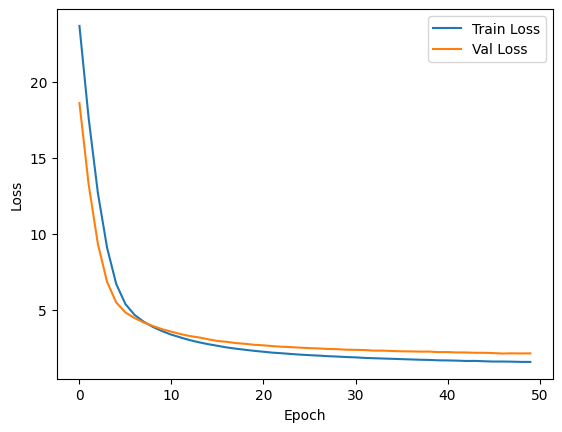

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
scaler_y.inverse_transform(y_test)
model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9374 - mean_absolute_error: 1.0835 - root_mean_squared_error: 1.3907 


[1.8864099979400635, 1.0835235118865967, 1.3734663724899292]

#### Function for fine tuning

In [26]:
def model_builder(hp):
    model = Sequential([
        Dense(hp.Int('units_1', 64, 256, 32), activation='relu', input_shape=(x_train.shape[1],)),
        Dense(hp.Int('units_2', 32, 128, 16), activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='mse',
                  metrics=['mae', RootMeanSquaredError()])
    return model

# tuner kita ini, kita set max_epochs nya 50, ga tau gpu kita sanggup atau ga dengan pengulangan segini TT
tuner = kt.Hyperband(
    model_builder,
    objective='val_loss',
    max_epochs=50,
    factor=3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fine tuning to find the best value for this model

Kode yang kita pakai ini sebenernya udh nyenggol bonus point yang call back tapi ga apa apa, secara overall ini digunakan untuk melatih model dengan hyperparameter terbaik menggunakan Keras Tuner. jadi pertama tama dimulai dengan pencarian kombinasi hyperparameter optimal, lalu model terbaik dibangun ulang dan dilatih lagi menggunakan data training dan validation.

Nah ini Early stopping digunain untuk menghentikan pelatihan lebih awal jika model tidak menunjukkan peningkatan dalam beberapa epoch. Setelah pelatihan selesai.

FInally model diuji menggunakan data testing, dan hasil evaluasi berupa loss, MAE (Mean Absolute Error), serta RMSE (Root Mean Squared Error) ditampilkan untuk menilai kinerja model dalam memprediksi data baru.

In [27]:
tuner.search(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

best_hps = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hps)

best_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)

eval_results = best_model.evaluate(x_test, y_test)
print(f"Loss: {eval_results[0]:.4f}, MAE: {eval_results[1]:.4f}, RMSE: {eval_results[2]:.4f}")

Trial 90 Complete [00h 00m 08s]
val_loss: 1.9102505445480347

Best val_loss So Far: 1.8910598754882812
Total elapsed time: 00h 07m 51s
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 17.7443 - mae: 3.6319 - root_mean_squared_error: 4.1760 - val_loss: 5.0310 - val_mae: 1.7565 - val_root_mean_squared_error: 2.2430
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9573 - mae: 1.5595 - root_mean_squared_error: 1.9883 - val_loss: 2.9167 - val_mae: 1.3241 - val_root_mean_squared_error: 1.7078
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4452 - mae: 1.1784 - root_mean_squared_error: 1.5626 - val_loss: 2.5706 - val_mae: 1.2153 - val_root_mean_squared_error: 1.6033
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0125 - mae: 1.1151 - root_mean_squared_error: 1.4160 - val_loss: 2.3434 - val_mae: 1.1684 - val_root_mean_squared_error: 1.5308
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1064 - mae: 1.1126 - root_mean_squared_error: 1.4506 - val_loss: 2.2044 - val_mae: 1.1256 - val_root_mean_squared_error: 1.4847
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7253 - ma

In [28]:
best_hps.values

{'units_1': 96,
 'units_2': 48,
 'learning_rate': 0.004531589379324198,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0046'}

#### Kesimpulan Sequential Model

Model Linear Regression menggunakan Sequential API dimana ini juga udah dioptimalkan melalui fine-tuning dan berhasil menunjukkan performa yang cukup baik, dengan MAE sebesar 1.09 dan RMSE sekitar 1.42, Di mana ini menandakan rata-rata kesalahan prediksi terhadap nilai aktual wine quality relatif kecil. Balik lagi karena data kita ini banyak outlier kita akan terpacu dengan MAE ya karena rumus RMSE itu terpengaruh dengan outliers, so kita lihat nilai MAE yang 1.09 mengindikasikan rata rata selisih antara nilai prediksi dan sebenerarnya berkisar 1.09.

Selain itu kita juga bisa lihat kalau Model ini bekerja dengan mempelajari hubungan linier antara fitur-fitur kimiawi wine, seperti kadar alkohol, PH, dan gula residu, untuk memprediksi kualitasnya dalam skala numerik. Dengan error yang kecil dan minim overfitting, model ini mampu memberikan estimasi yang cukup akurat terhadap kualitas wine, meskipun begitu nilai loss yang kita dapat 2.0024 mengindikasikan juga kalau model kita belum sesempurna itu juga masih ada mistake kecil yang diperbuat selama mempredict nilai quality.

In [35]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss", mode="min")
callbacks = [checkpoint, early_stopping]
history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=callbacks)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3841 - mean_absolute_error: 0.9132 - root_mean_squared_error: 1.1755 - val_loss: 2.0031 - val_mean_absolute_error: 1.0757 - val_root_mean_squared_error: 1.4153
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3123 - mean_absolute_error: 0.8938 - root_mean_squared_error: 1.1449 - val_loss: 1.9905 - val_mean_absolute_error: 1.0694 - val_root_mean_squared_error: 1.4109
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3768 - mean_absolute_error: 0.9127 - root_mean_squared_error: 1.1730 - val_loss: 1.9762 - val_mean_absolute_error: 1.0701 - val_root_mean_squared_error: 1.4058
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3232 - mean_absolute_error: 0.9027 - root_mean_squared_error: 1.1500 - val_loss: 2.0108 - val_mean_absolute_error: 1.0705 - val_root_mean_squared_error: 1.4180
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3008 - mean_absolute_error: 0.8941 - root_mean_squared_

#### BONUS 3. Implement a callback function. You can use model checkpoints, CSV logger, early stopping, etc. (max. 5 points)


In [40]:
best_model = load_model("best_model.keras")
test_loss, test_mae, test_rmse = best_model.evaluate(test_ds)

print(f"Best Model Test Loss: {test_loss:.4f}")
print(f"Best Model Test MAE: {test_mae:.4f}")
print(f"Best Model Test RMSE: {test_rmse:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7774 - mean_absolute_error: 1.0307 - root_mean_squared_error: 1.3324  
Best Model Test Loss: 1.7269
Best Model Test MAE: 1.0282
Best Model Test RMSE: 1.3141


#### BONUS 4. In your own words, explain briefly what a callback function does! (max. 1 point)

first of all saya mau explain yang saya gunain , nah di atas saya gunain callback function di checkpoint dan earlystopping nah untuk tahu apa sih callback function, ya kita harus tau dari contohnya. Oke :
1. untuk earlystopping = ini merupakan callback functions yang digunain untuk memberhentikan proses training apabila dilihat tidak ada perkembangan epochs selama 5 pengulangan ( kenapa 5 pengulangan karena kesabaran sih early stopping atau patience cuman 5 gitu ) nah kenapa saya pilih 5 karena menurut saya ideal nya sih gitu (# angka favorit 5).
2. untuk checkpoint = dari nama udah jelas ya dia itu kayak ngesimpen val loss yang paling bagus gitu (dijadiin checkpoint) kenapa karena biasanya kalau dalam training dia run terus sampai epochsnya yg ditentukan dan ga akan berhenti atau nyimpen kalau val lossnya sekalipun ada yang lebih kecil dari epochs yang terakhir gitu. Nah tugas checkpoint nyimpenin nilai itu. Selain itu bisa dipanggil juga deng.

(jadi kayak Fine tuning + callbacks ini op bgt sih untuk dapat hasil training yang paing efisien ) , early stopping biar dia simpen memori ga run gila gilaan , dan checkpoint buat cari nilai bagusnya sampai distop. Nah jadi apa sih callbacks ?

Callbacks itu kayak sebuah function tambahan dalam keras yang memungkinkan kita untuk mengontrol proses pelatihan model baik dr segi berhenti lebih cepat, learning rate lebih dinamis bahkan untuk save val loss terbaik dan load itu nantinya.

#### KESIMPULAN Overall

Setelah melihat hasil dari functional model kita dapat melihat kalau model Sequential lebih akurat dibandingkan model Functional.
DImana Nilai Loss, MAE, dan RMSE lebih rendah dari Sequential
1. Baik untuk loss (1.7269 and 2.5394)
2. Maupun untuk MAE (1.0282 and 1.2410)
3. dan untuk RMSE(1.3141 and 1.5930)

yang berarti prediksinya sequential lebih baik dari functional. Hal ini juga mungkin dikarenakan satu dua hal dimana functional yang belum di fine tuning walaupun begitu hasil pertama sequential masih lebih bagus dari functional. untuk furtherworksnya mungkin functional model masih bisa dengan menambah batch atau drop out juga agar menghasilkan loss, mae, and rmse yang better dari Sequential. Sedangkan untuk sequential ga 100% bagus juga masih ada yang kurang namun memiliki nilai rmse dan mae yang jauh better dr functional. Kembali mengingat kalau data kita ini inbalance terutama untuk di qualitynya dimana ga sepenuhnya ada juga data 0 - 10 walaupun begitu sudah di atasi dengan pengubahan dengan min max scaling. Selain itu model kita juga menggunakan linear not sigmoid karena setelah saya coba linear jauh lebih bagus pak comparison lossnya 1 : 10 (lineaar : sigmoid ). Begitulah in the end gitu untuk furtherworks yang bisa dilakukan bisa dengan menambahkan hidden layer baru sih soalnya masih terlalu simpel dan menambah batching untuk sequential dan fine tuning untuk functional model.